# Program 4: Benchmarking Heaps
### Cody Morrow, Akashdeep Gill, Caleb Andreano

The Python `heapq` module provides an implementation of a min-heap, or a priority queue where smaller elements are 
considered higher priority. The `heap` data structure is implemented on the python `List` type, and the methods provided
by the library are used to guarantee that the min-heap property is maintained for the array. This property can be 
expressed as for all `k`, `heap[k] <= heap[2k+1] <= heap[2k+2]`. 

First, the `heapify` function takes a `List` as an argument and mutates it in-place to satisfy the min-heap property. 
Second, the `heappop` method takes a `List`, removes the smallest element, and returns it, maintaining the min-heap 
property. For a `List` already satisfying the property, this is just the first element or index 0. 
`heappush` adds an element to the array, mutating the array to maintain the min-heap property. Finally, 
`heapreplace` calls `heappush` on the target element and subsequently calls `heappop`, adding the new element and then 
removing the new smallest element. A side effect of this is that if the target element is smaller than all elements
currently in the heap, then it will be added and then immediately removed. 



## Benchmarking `heapify`
The `heapify` function rearranges a `List` in-place to maintain the min-heap invariant. Using the canonical implementation for `heapify`, we'd expect a runtime of 
$$
T(n) = 
\begin{cases}
1 & n = 1 \\ 
2T(\frac{n}{2}) + \Theta(\log n) & \text{otherwise}
\end{cases}
$$
which in closed form, is 
$$
T(n) = O(n)
$$

We identify three general cases for the runtime of the `heapify` function:
1. Best case: the target list is already in heap order. We would expect this to run in either $O(1)$ constant time, or $O(n)$ linear time if `heapify` still needs to traverse the array once. 
2. Average case: the list elements are in no particular order. We would expect this to run in a slower $O(n)$ linear time, because some elements will need to go through more swaps than others, and multiple new roots may need to be chosen. 
3. Worst case: list is reverse sorted. This is the worst case because starting from the front of the array, each subsequent element will become the new root (smallest element so far), and every previous element will need to be bubbled down through the tree. 

Benchmarking `heapify` yields the following:
| List Size | Best Case Time (s) | Average Case Time (s) | Worst Case Time (s) | 
|---|---|---|---|
|         100|     2.5e-06 |     3.9e-06 |     1.8e-06 |
|        1000|    1.63e-05 |    2.49e-05 |    1.29e-05 |
|        2500|    4.14e-05 |    6.37e-05 |    3.12e-05 |
|       10000|   0.0001933 |   0.0003558 |   0.0001533 |
|       20000|   0.0003561 |   0.0005594 |    0.000318 |
|       30000|   0.0006033 |   0.0008342 |   0.0005074 |
|       50000|   0.0009971 |    0.001788 |   0.0009539 |
|      100000|    0.001942 |    0.002327 |    0.001227 |
|     1000000|     0.01466 |     0.02144 |     0.01117 |
|    10000000|      0.1536 |      0.2226 |      0.1172 |

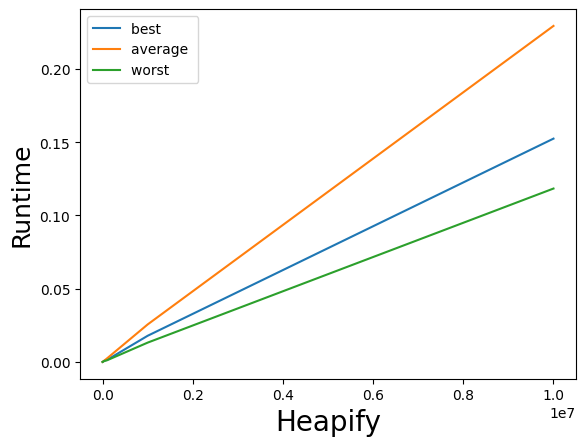

As we can see, all three cases run in linear time. However, we see that our theoretical average case does not match what we would expect. 
// TODO: Why

## Appendix: Source code

In [8]:
from enum import Enum
from random import randint
import time
import heapq
import matplotlib.pyplot as plt

def benchmark(algorithm, list):
    start_time = time.perf_counter()
    algorithm(list)
    end_time = time.perf_counter()
    elapsed = end_time - start_time
    return elapsed

class Ordering(Enum):
    Unsorted = 1
    Sorted = 2
    RevSorted = 3

def generate_list(ordering, length):
    l = [None] * length
    match ordering:
        case Ordering.Unsorted:
            for i in range(length):
                l[i] = randint(0, length*10)
        case Ordering.Sorted:
            for i in range(length):
                l[i] = i
        case Ordering.RevSorted:
            for i in range(length):
                l[i] = (length - i - 1)
    return l

list_sizes = [100, 1000, 2500, 10000, 20000, 30000, 50000, 100000, 1000000, 10000000]

| List Size | Best Case Time (s) | Average Case Time (s) | Worst Case Time (s) | 
|---|---|---|---|
|         100|     3.3e-06 |     3.5e-06 |     1.4e-06 |
|        1000|    1.58e-05 |    2.52e-05 |    1.23e-05 |
|        2500|    3.13e-05 |    5.08e-05 |    2.45e-05 |
|       10000|   0.0001561 |   0.0002158 |   0.0001046 |
|       20000|   0.0004541 |   0.0005583 |   0.0002948 |
|       30000|   0.0005076 |   0.0006826 |   0.0006386 |
|       50000|   0.0009949 |    0.001199 |   0.0006953 |
|      100000|     0.00141 |    0.002441 |    0.001135 |
|     1000000|     0.01786 |     0.02559 |     0.01318 |
|    10000000|      0.1525 |      0.2294 |      0.1184 |


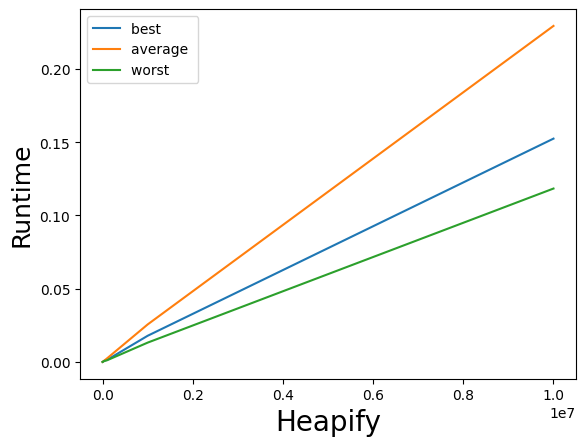

In [10]:
best_times = []
avg_times = []
worst_times = []
for length in list_sizes:
    best = generate_list(Ordering.Sorted, length)
    heapq.heapify(best)
    avg = generate_list(Ordering.Unsorted, length)
    worst = generate_list(Ordering.RevSorted, length)

    best_times.append(benchmark(heapq.heapify, best))
    avg_times.append(benchmark(heapq.heapify, avg))
    worst_times.append(benchmark(heapq.heapify, worst))

print("| List Size | Best Case Time (s) | Average Case Time (s) | Worst Case Time (s) | ")
print("|---|---|---|---|")
for i in range(0, len(best_times)):
    print(f'|{list_sizes[i]:>12}|{best_times[i]:>12.4} |{avg_times[i]:>12.4} |{worst_times[i]:>12.4} |')

plt.plot(list_sizes, best_times, label="best ")
plt.plot(list_sizes, avg_times, label="average ")
plt.plot(list_sizes, worst_times, label="worst ")
plt.xlabel("List Size", fontsize=18)
plt.ylabel("Runtime", fontsize=18)
plt.xlabel("Heapify", fontsize=20)
plt.legend()


